### 图像的点运算
 + Task.1 线性运算
 + Task.2 分段线性运算
 + Task.3 非线性运算

In [9]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
image = cv2.imread("Fig0201.bmp")

In [10]:
#线性变换
def linear_change(pixel):
    process_pixel = 2 * pixel 
    pixel_new = min(255,process_pixel)
    return pixel_new
#分块线性变换
def piecewise_linear_change(pixel):
    if pixel < 40:
        process_pixel = 2 * pixel
        pixel_new = min(255,process_pixel)
        return pixel_new
    else:
        process_pixel = int(0.5 * pixel + 0.5)
        return process_pixel
#非线性变换
def non_linear_change(pixel):
    pixel_new = min(255,math.pow(pixel,2))
    return pixel_new

+ 因为像素值只在0-255，所有建立一个查找表加速查找

In [11]:
#创建各个变换的查找表
LUT_Linear = np.zeros(256)
LUT_pLinear = np.zeros(256)
LUT_noLinear = np.zeros(256)

for pixel in range(256):
    LUT_Linear[pixel] = linear_change(pixel)
    LUT_pLinear[pixel] = piecewise_linear_change(pixel)
    LUT_noLinear[pixel] = non_linear_change(pixel)
LUT_Linear,LUT_pLinear,LUT_noLinear

(array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,
         22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,
         44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,
         66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,
         88.,  90.,  92.,  94.,  96.,  98., 100., 102., 104., 106., 108.,
        110., 112., 114., 116., 118., 120., 122., 124., 126., 128., 130.,
        132., 134., 136., 138., 140., 142., 144., 146., 148., 150., 152.,
        154., 156., 158., 160., 162., 164., 166., 168., 170., 172., 174.,
        176., 178., 180., 182., 184., 186., 188., 190., 192., 194., 196.,
        198., 200., 202., 204., 206., 208., 210., 212., 214., 216., 218.,
        220., 222., 224., 226., 228., 230., 232., 234., 236., 238., 240.,
        242., 244., 246., 248., 250., 252., 254., 255., 255., 255., 255.,
        255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
        255., 255., 255., 255., 255., 

In [12]:
width,height,channel = image.shape
imageLinear = np.zeros((width,height,channel),np.uint8)
imagePLinear = np.zeros((width,height,channel),np.uint8)
imageNoLinear = np.zeros((width,height,channel),np.uint8)
for x in range(width):
    for y in range(height):
        imageLinear[x,y] = (LUT_Linear[image[x,y][0]],LUT_Linear[image[x,y][1]],LUT_Linear[image[x,y][2]])
        imagePLinear[x,y] = (LUT_pLinear[image[x,y][0]],LUT_pLinear[image[x,y][1]],LUT_pLinear[image[x,y][2]])
        imageNoLinear[x,y] = (LUT_noLinear[image[x,y][0]],LUT_noLinear[image[x,y][1]],LUT_noLinear[image[x,y][2]])
# cv2.imwrite("1.bmp",imageLinear)
# cv2.imwrite("2.bmp",imagePLinear)
# cv2.imwrite("3.bmp",imageNoLinear)
# imagePLinear

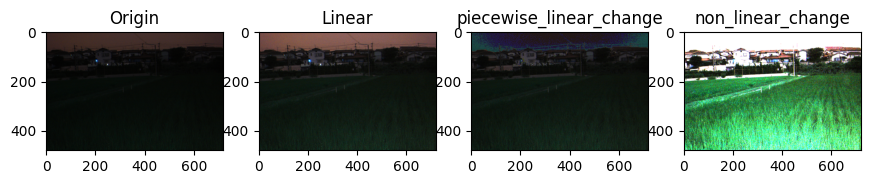

In [13]:
#可视化：
plt.figure(figsize=(16,4))
plt.subplot(161),plt.imshow(image) 
plt.title("Origin")  
plt.subplot(162),plt.imshow(imageLinear) 
plt.title("Linear") 
plt.subplot(163),plt.imshow(imagePLinear) 
plt.title("piecewise_linear_change") 
plt.subplot(164),plt.imshow(imageNoLinear) 
plt.title("non_linear_change") 
plt.show()